In [70]:
import pandas as pd
import BatteryObject
import CalculateVOC
import matplotlib as plt
import numpy as np

In [53]:
test_set = pd.read_csv("Test180.csv", low_memory = False)

In [54]:
test_set = test_set.iloc[18:, 0:]
test_set.columns = test_set.iloc[0]
test_set = test_set.iloc[1:, 0:]


18,Test,Cell,Rack,Shelf,Position,Cell ID,Step,Total Time (Seconds),Voltage (V),Current (A),Charge Capacity (mAh),Discharge Capacity (mAh),TC1 (°C),NaN
19,180,1,SBT2050,2,1,5,0,0.1,3.3477916,0,0,0,NaN,NaN
20,180,1,SBT2050,2,1,5,0,0.2,3.347601,0,0,0,NaN,NaN
21,180,1,SBT2050,2,1,5,0,0.3,3.3476962,0,0,0,NaN,NaN
22,180,1,SBT2050,2,1,5,0,0.4,3.347887,0,0,0,NaN,NaN
23,180,1,SBT2050,2,1,5,0,0.5,3.3476486,0,0,0,NaN,NaN
24,180,1,SBT2050,2,1,5,0,0.6,3.3476962,0,0,0,NaN,NaN
25,180,1,SBT2050,2,1,5,0,0.7,3.3478512,0,0,0,NaN,NaN
26,180,1,SBT2050,2,1,5,0,0.8,3.3477916,0,0,0,NaN,NaN
27,180,1,SBT2050,2,1,5,0,0.9,3.347887,0,0,0,NaN,NaN
28,180,1,SBT2050,2,1,5,0,1,3.347744,0,0,0,21.9,NaN


In [55]:
test_set = test_set.loc[:, ["Total Time (Seconds)", "Voltage (V)", "Current (A)"]]
test_set = test_set.reset_index()

# Convert charge from mAh to Ah

test_set = test_set.astype(float)

test_set["Charge Capacity (Ah)"] = test_set["Charge Capacity (mAh)"] / 1000
test_set["Discharge Capacity (Ah)"] = test_set["Discharge Capacity (mAh)"] / 1000
test_set

18,index,Total Time (Seconds),Voltage (V),Current (A),Charge Capacity (mAh),Discharge Capacity (mAh),Charge Capacity (Ah),Discharge Capacity (Ah)
0,19.0,0.100,3.347792,0.000000,0.000,0.00,0.000000,0.00000
1,20.0,0.200,3.347601,0.000000,0.000,0.00,0.000000,0.00000
2,21.0,0.300,3.347696,0.000000,0.000,0.00,0.000000,0.00000
3,22.0,0.400,3.347887,0.000000,0.000,0.00,0.000000,0.00000
4,23.0,0.500,3.347649,0.000000,0.000,0.00,0.000000,0.00000
...,...,...,...,...,...,...,...,...
683893,683912.0,68388.200,2.864646,0.000000,15474.213,15481.92,15.474213,15.48192
683894,683913.0,68388.300,2.864444,0.000000,15474.213,15481.92,15.474213,15.48192
683895,683914.0,68388.400,2.865138,-0.000036,15474.213,15481.92,15.474213,15.48192
683896,683915.0,68388.500,2.864995,-0.000100,15474.213,15481.92,15.474213,15.48192


<AxesSubplot:xlabel='Total Time (Seconds)'>

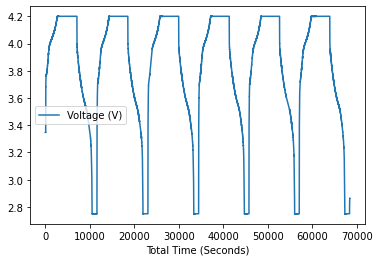

In [66]:
test_set.plot(x = "Total Time (Seconds)", y = "Voltage (V)")

In [58]:
C_max = 2.7

def compute_soc(row):
    return (C_max - abs(row['Discharge Capacity (Ah)'] - row['Charge Capacity (Ah)'])) / C_max 

test_set['SOC'] = test_set.apply(compute_soc, axis=1)

In [68]:
# Create Battery Object to Test
V_max = test_set["Voltage (V)"].max()
V_oc_init = test_set["Voltage (V)"][0]
soc_init = 0.05


battery_test = BatteryObject.Battery(soh = 1, soc = soc_init, C_bat = 2.7, V_oc = V_oc_init, V_max = test_set["Voltage (V)"].max())

In [82]:
seconds = test_set["Total Time (Seconds)"].diff().fillna(0)
current = test_set["Current (A)"]
test_voltages = []

for i in range(seconds.shape[0]):
    battery_test.update(seconds = seconds[i], I = current[i], T_f = 21.8)
    test_voltages.append(battery_test.V_oc)




KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(seconds, test_voltages, color = "red")
plt.plot(seconds, test_set["Voltage (V)"], color = "blue")
